# **Project Name**    - Fish Classification Project

##### **Project Type**    - Classification
##### **Contribution**    - Individual
Name - Shawn Lasrado


# **GitHub Link -**


**Project Explanation**-

In this project, we developed an intelligent image classification system to accurately identify various fish species from user-uploaded images. Leveraging state of the art convolutional neural network architectures (such as MobileNet, ResNet50, InceptionV3, EfficientNetB0, and VGG16), we applied transfer learning techniques to boost classification accuracy using a labeled fish dataset encompassing 11 distinct species. The models were rigorously trained, fine tuned with class weighting to address data imbalance, and evaluated to select the most reliable performer. The ultimate model was then integrated into a user friendly Streamlit web application, allowing users to upload and analyze fish images in real time returning species predictions and confidence scores instantly. Robust preprocessing ensures images fed to the model match its training pipeline, and the app interface displays both top predictions and the full confidence distribution across all classes.

In [17]:
# Data & Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Model & Processing
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix


In [18]:
# Set your data paths (change as needed)
train_dir = "train"
val_dir = "val"
test_dir = "test"

In [20]:
img_height, img_width = 224, 224
batch_size = 32

In [21]:
# Training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation/Test: Only rescale
test_val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
val_gen = test_val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
test_gen = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
num_classes = train_gen.num_classes
class_labels = list(train_gen.class_indices.keys())
print(class_labels)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
['animal fish', 'animal fish bass', 'fish sea_food black_sea_sprat', 'fish sea_food gilt_head_bream', 'fish sea_food hourse_mackerel', 'fish sea_food red_mullet', 'fish sea_food red_sea_bream', 'fish sea_food sea_bass', 'fish sea_food shrimp', 'fish sea_food striped_red_mullet', 'fish sea_food trout']


In [11]:
cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn = cnn_model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]
)
cnn_model.save('cnn_fish_classifier.h5')


/Users/shawnlasrado/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.2157 - loss: 2.6635 - val_accuracy: 0.3370 - val_loss: 1.8115
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.3831 - loss: 1.7021 - val_accuracy: 0.5229 - val_loss: 1.3092
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 246s 1s/step - accuracy: 0.4742 - loss: 1.4502 - val_accuracy: 0.6227 - val_loss: 1.0290
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.5455 - loss: 1.2374 - val_accuracy: 0.7363 - val_loss: 0.8193
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.5831 - loss: 1.1165 - val_accuracy: 0.7372 - val_loss: 0.7597
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.6134 - loss: 1.0686 - val_accuracy: 0.7473 - val_loss: 0.6920
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - accuracy: 0.6377 - loss: 1.0044 - val_accuracy: 0.7821 - val_loss: 0.6780
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 290s 1s/step - accuracy: 0.6683 - loss: 0.9171 - val_accu

In [5]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

vgg_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_vgg = vgg_model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    callbacks=[EarlyStopping(patience=3, restore_best_weights=True)]
)
vgg_model.save('vgg16_fish_classifier.h5')


/Users/shawnlasrado/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 5440s 28s/step - accuracy: 0.3115 - loss: 1.9963 - val_accuracy: 0.6951 - val_loss: 1.1740
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1421s 7s/step - accuracy: 0.6317 - loss: 1.1696 - val_accuracy: 0.8443 - val_loss: 0.7297
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1422s 7s/step - accuracy: 0.7386 - loss: 0.8474 - val_accuracy: 0.8626 - val_loss: 0.5530
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1425s 7s/step - accuracy: 0.8030 - loss: 0.6489 - val_accuracy: 0.8910 - val_loss: 0.4317
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1455s 7s/step - accuracy: 0.8248 - loss: 0.5562 - val_accuracy: 0.9011 - val_loss: 0.3902
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1485s 8s/step - accuracy: 0.8393 - loss: 0.5064 - val_accuracy: 0.9258 - val_loss: 0.3049
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1470s 8s/step - accuracy: 0.8732 - loss: 0.4442 - val_accuracy: 0.9322 - val_loss: 0.2659
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 1508s 8s/step - accuracy: 0.8794 - loss: 0.3879 -

In [6]:
def build_and_train_model(base_model_class, model_name):
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
    base_model.trainable = False  # Freeze base model initially

    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    print(f"Training {model_name} model...")
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=10,
        callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
    )

    model.save(f'{model_name.lower()}_fish_classifier.h5')
    print(f"{model_name} model saved.")

    return model, history

# Train ResNet50
resnet_model, resnet_history = build_and_train_model(ResNet50, 'ResNet50')

# Train MobileNet
mobilenet_model, mobilenet_history = build_and_train_model(MobileNet, 'MobileNet')

# Train InceptionV3
inception_model, inception_history = build_and_train_model(InceptionV3, 'InceptionV3')

# Train EfficientNetB0
efficientnet_model, efficientnet_history = build_and_train_model(EfficientNetB0, 'EfficientNetB0')

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Training ResNet50 model...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.1493 - loss: 2.4235 - val_accuracy: 0.1712 - val_loss: 2.2614
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 426s 2s/step - accuracy: 0.1727 - loss: 2.2649 - val_accuracy: 0.1676 - val_loss: 2.2010
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 430s 2s/step - accuracy: 0.1817 - loss: 2.2165 - val_accuracy: 0.2015 - val_loss: 2.1301
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - accuracy: 0.1986 - loss: 2.1745 - val_accuracy: 0.2381 - val_loss: 2.0835
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 444s 2s/step - accuracy: 0.2108 - loss: 2.1264 - val_accuracy: 0.2445 - val_loss: 2.0416
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 451s 2s/step - accuracy: 0.2269 - loss: 2.0925 - val_accuracy: 0.2903 - val_loss: 2.0346
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 447s 2s/step - accuracy: 0.2227 - loss: 2.0842 - val_accuracy: 0.2683 - val_loss: 1.9987
Epoch 8/10
195/195 

ResNet50 model saved.
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training MobileNet model...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 144s 730ms/step - accuracy: 0.6171 - loss: 1.2196 - val_accuracy: 0.9780 - val_loss: 0.1036
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 141s 725ms/step - accuracy: 0.9242 - loss: 0.2214 - val_accuracy: 0.9908 - val_loss: 0.0500
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 139s 711ms/step - accuracy: 0.9589 - loss: 0.1377 - val_accuracy: 0.9908 - val_loss: 0.0385
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 129s 663ms/step - accuracy: 0.9671 - loss: 0.1011 - val_accuracy: 0.9927 - val_loss: 0.0306
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 129s 661ms/step - accuracy: 0.9654 - loss: 0.1074 - val_accuracy: 0.9954 - val_loss: 0.0242
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 132s 675ms/step - accuracy: 0.9729 - loss: 0.0855 - val_accuracy: 0.9927 - val_loss: 0.0285
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 135s 690ms/step - accuracy: 0.9798 - loss: 0.0675 - val_accuracy: 0

MobileNet model saved.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training InceptionV3 model...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.5538 - loss: 1.3643 - val_accuracy: 0.9148 - val_loss: 0.2928
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.8407 - loss: 0.4566 - val_accuracy: 0.9414 - val_loss: 0.1840
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.8775 - loss: 0.3641 - val_accuracy: 0.9615 - val_loss: 0.1374
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 320s 2s/step - accuracy: 0.8994 - loss: 0.3075 - val_accuracy: 0.9432 - val_loss: 0.1493
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.8922 - loss: 0.3026 - val_accuracy: 0.9615 - val_loss: 0.1036
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.9115 - loss: 0.2693 - val_accuracy: 0.9478 - val_loss: 0.1329
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.9203 - loss: 0.2355 - val_accuracy: 0.9661 - val_loss: 

InceptionV3 model saved.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training EfficientNetB0 model...
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 175s 872ms/step - accuracy: 0.1426 - loss: 2.3793 - val_accuracy: 0.1712 - val_loss: 2.3179
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 169s 868ms/step - accuracy: 0.1630 - loss: 2.3242 - val_accuracy: 0.1712 - val_loss: 2.3110
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 175s 897ms/step - accuracy: 0.1738 - loss: 2.3174 - val_accuracy: 0.1712 - val_loss: 2.3117
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.1811 - loss: 2.3034 - val_accuracy: 0.1712 - val_loss: 2.3130
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.1769 - loss: 2.3042 - val_accuracy: 0.1712 - val_loss: 2.3112


EfficientNetB0 model saved.


/Users/shawnlasrado/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 711s 7s/step - accuracy: 0.9681 - loss: 0.1358
VGG16 Test Loss: 0.1728
VGG16 Test Accuracy: 0.9586
100/100 ━━━━━━━━━━━━━━━━━━━━ 641s 6s/step
                                  precision    recall  f1-score   support

                     animal fish       0.97      0.99      0.98       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.94      0.99      0.96       298
   fish sea_food gilt_head_bream       0.96      0.97      0.97       305
   fish sea_food hourse_mackerel       0.96      0.96      0.96       286
        fish sea_food red_mullet       0.94      0.91      0.92       291
     fish sea_food red_sea_bream       1.00      0.94      0.97       273
          fish sea_food sea_bass       1.00      0.93      0.97       327
            fish sea_food shrimp       0.97      0.98      0.98       289
fish sea_food striped_red_mullet       0.85      0.94      0.89       293
             fi

/Users/shawnlasrado/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shawnlasrado/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shawnlasrado/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

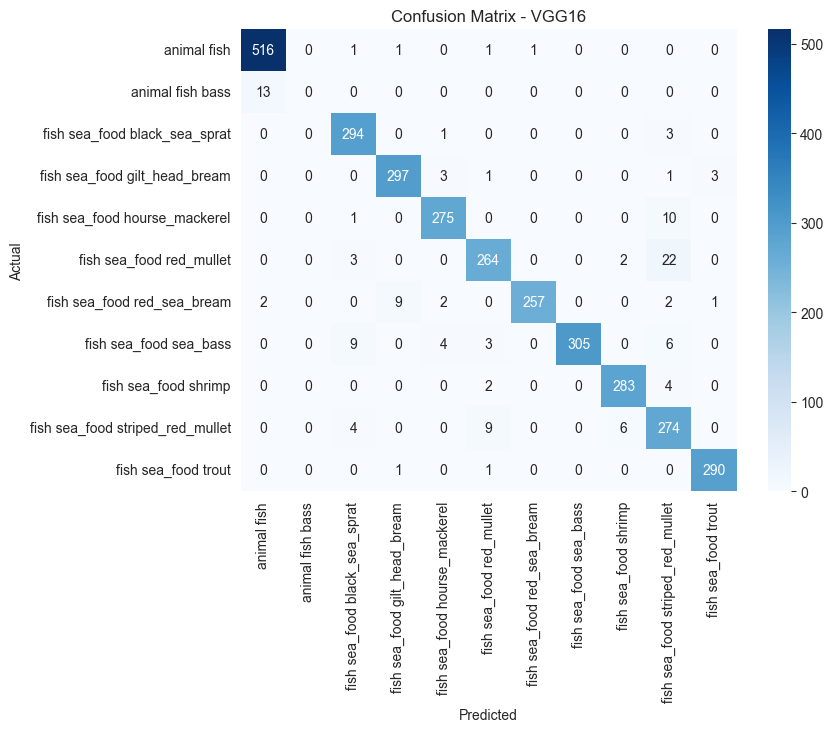

In [7]:
# --- VGG16 Model Evaluation ---
vgg_model = tf.keras.models.load_model('vgg16_fish_classifier.h5')

# Evaluate VGG16 on test data
vgg_score = vgg_model.evaluate(test_gen)
print(f"VGG16 Test Loss: {vgg_score[0]:.4f}")
print(f"VGG16 Test Accuracy: {vgg_score[1]:.4f}")

# Classification report & confusion matrix
y_true_vgg = test_gen.classes
y_pred_vgg = np.argmax(vgg_model.predict(test_gen), axis=1)
print(classification_report(y_true_vgg, y_pred_vgg, target_names=class_labels))

cm_vgg = confusion_matrix(y_true_vgg, y_pred_vgg)
plt.figure(figsize=(8,6))
sns.heatmap(cm_vgg, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - VGG16")
plt.show()


100/100 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.4073 - loss: 1.6908
ResNet50 Test Loss: 1.9638
ResNet50 Test Accuracy: 0.2962
100/100 ━━━━━━━━━━━━━━━━━━━━ 185s 2s/step
                                  precision    recall  f1-score   support

                     animal fish       0.39      0.77      0.52       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.22      0.31      0.26       286
        fish sea_food red_mullet       0.53      0.26      0.35       291
     fish sea_food red_sea_bream       0.50      0.01      0.03       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.26      0.58      0.36       289
fish sea_food striped_red_mullet       0.24      0.06      0.10       293
         

/Users/shawnlasrado/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shawnlasrado/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shawnlasrado/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

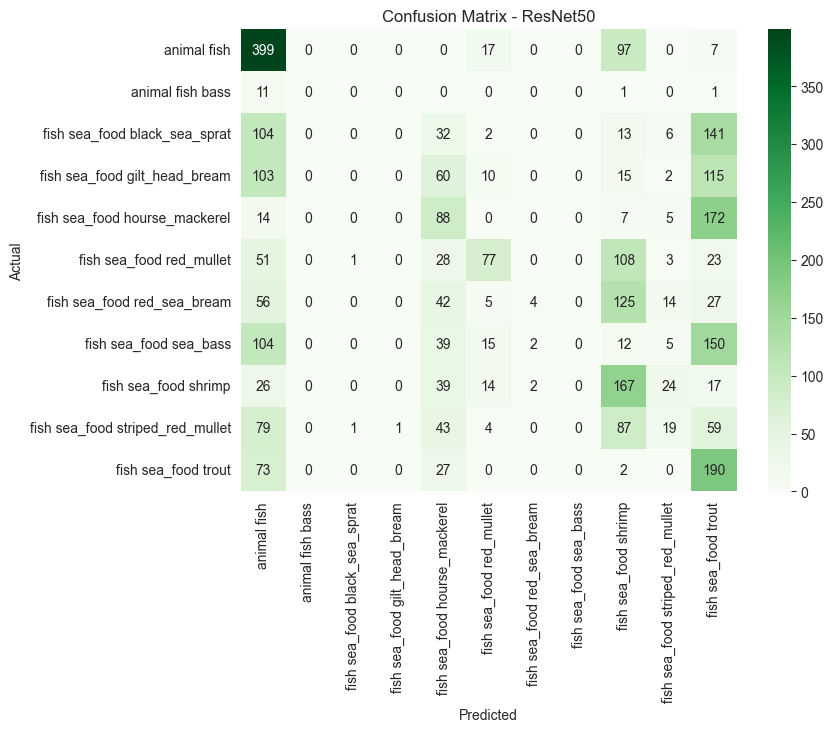

In [8]:
# Load the saved ResNet50 model
resnet_model = tf.keras.models.load_model('resnet50_fish_classifier.h5')

# Now, evaluate the model on the test data
resnet_score = resnet_model.evaluate(test_gen)
print(f"ResNet50 Test Loss: {resnet_score[0]:.4f}")
print(f"ResNet50 Test Accuracy: {resnet_score[1]:.4f}")

# Get true and predicted labels
y_true_resnet = test_gen.classes
y_pred_resnet = np.argmax(resnet_model.predict(test_gen), axis=1)

# Print classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true_resnet, y_pred_resnet, target_names=class_labels))

# Plot confusion matrix

cm_resnet = confusion_matrix(y_true_resnet, y_pred_resnet)
plt.figure(figsize=(8,6))
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - ResNet50")
plt.show()

100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 444ms/step - accuracy: 0.9981 - loss: 0.0103
MobileNet Test Loss: 0.0091
MobileNet Test Accuracy: 0.9987
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 440ms/step
                                  precision    recall  f1-score   support

                     animal fish       1.00      1.00      1.00       520
                animal fish bass       1.00      0.92      0.96        13
   fish sea_food black_sea_sprat       0.99      1.00      1.00       298
   fish sea_food gilt_head_bream       1.00      1.00      1.00       305
   fish sea_food hourse_mackerel       1.00      1.00      1.00       286
        fish sea_food red_mullet       1.00      1.00      1.00       291
     fish sea_food red_sea_bream       1.00      1.00      1.00       273
          fish sea_food sea_bass       1.00      1.00      1.00       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       1.00      1.00      1.00       293
   

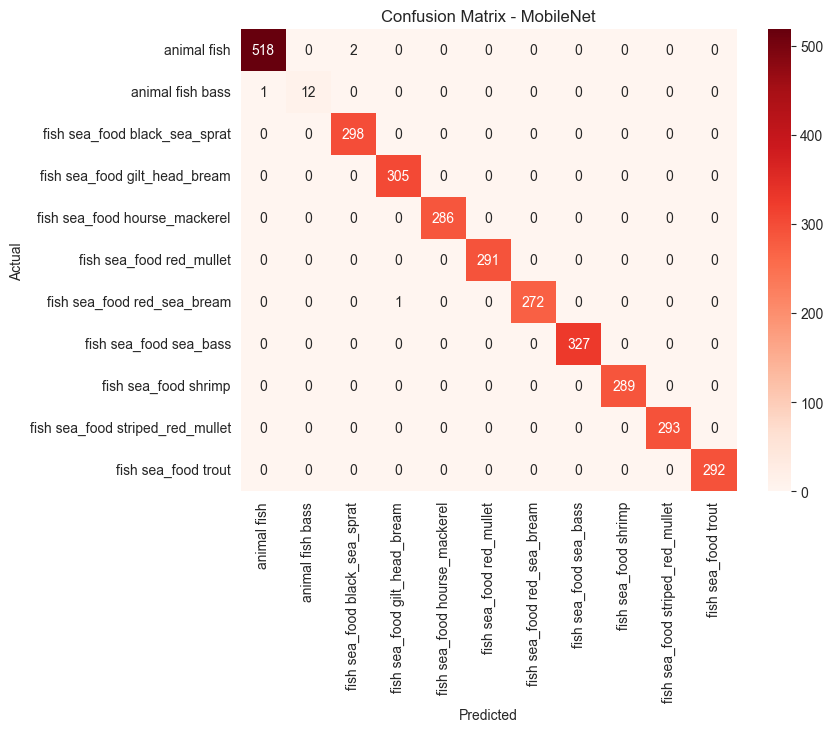

In [9]:
# Load the saved MobileNet model (adjust path if needed)
mobilenet_model = tf.keras.models.load_model('mobilenet_fish_classifier.h5')

# Evaluate MobileNet model on your test set generator
mobilenet_score = mobilenet_model.evaluate(test_gen)
print(f"MobileNet Test Loss: {mobilenet_score[0]:.4f}")
print(f"MobileNet Test Accuracy: {mobilenet_score[1]:.4f}")

# Predict classes for test data
y_true_mobilenet = test_gen.classes
y_pred_mobilenet = np.argmax(mobilenet_model.predict(test_gen), axis=1)

# Print classification report to see precision, recall, f1-score per class
print(classification_report(y_true_mobilenet, y_pred_mobilenet, target_names=class_labels))

# Create and plot confusion matrix heatmap for detailed error analysis
cm_mobilenet = confusion_matrix(y_true_mobilenet, y_pred_mobilenet)
plt.figure(figsize=(8,6))
sns.heatmap(cm_mobilenet, annot=True, fmt='d', cmap='Reds',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - MobileNet")
plt.show()

100/100 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.9764 - loss: 0.0733
InceptionV3 Test Loss: 0.0657
InceptionV3 Test Accuracy: 0.9765
100/100 ━━━━━━━━━━━━━━━━━━━━ 132s 1s/step
                                  precision    recall  f1-score   support

                     animal fish       0.98      0.99      0.98       520
                animal fish bass       0.75      0.23      0.35        13
   fish sea_food black_sea_sprat       1.00      0.97      0.98       298
   fish sea_food gilt_head_bream       0.96      0.99      0.98       305
   fish sea_food hourse_mackerel       0.99      0.99      0.99       286
        fish sea_food red_mullet       1.00      0.91      0.95       291
     fish sea_food red_sea_bream       1.00      0.97      0.98       273
          fish sea_food sea_bass       0.96      0.98      0.97       327
            fish sea_food shrimp       1.00      1.00      1.00       289
fish sea_food striped_red_mullet       0.89      0.98      0.94       293
   

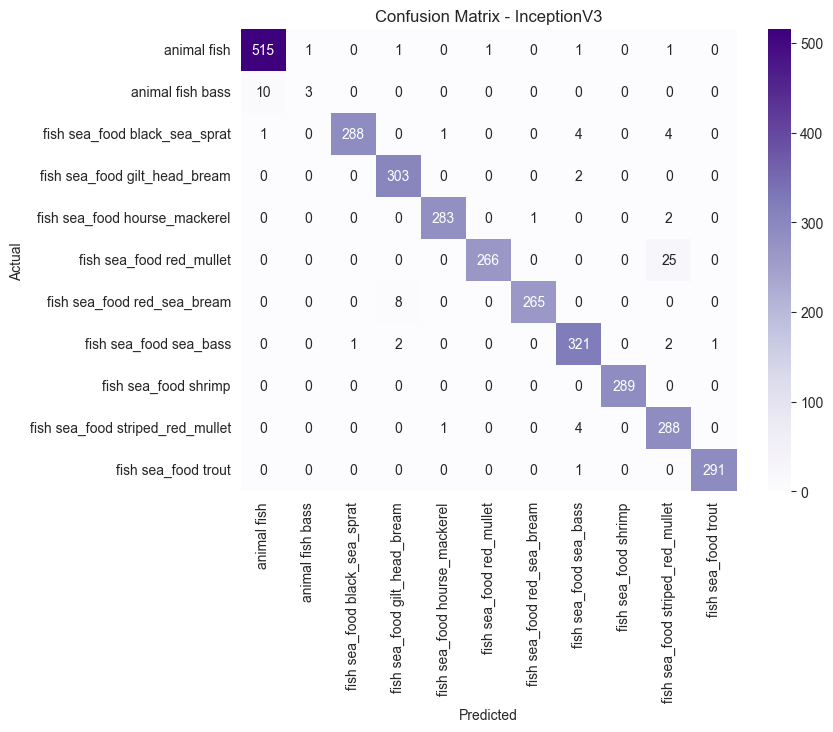

In [10]:
# Load the saved InceptionV3 model (adjust path if needed)
inception_model = tf.keras.models.load_model('inceptionv3_fish_classifier.h5')

# Evaluate InceptionV3 model on your test set generator
inception_score = inception_model.evaluate(test_gen)
print(f"InceptionV3 Test Loss: {inception_score[0]:.4f}")
print(f"InceptionV3 Test Accuracy: {inception_score[1]:.4f}")

# Predict classes for test data
y_true_inception = test_gen.classes
y_pred_inception = np.argmax(inception_model.predict(test_gen), axis=1)

# Print classification report to see precision, recall, f1-score per class
print(classification_report(y_true_inception, y_pred_inception, target_names=class_labels))

# Create and plot confusion matrix heatmap for detailed error analysis
cm_inception = confusion_matrix(y_true_inception, y_pred_inception)
plt.figure(figsize=(8,6))
sns.heatmap(cm_inception, annot=True, fmt='d', cmap='Purples',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - InceptionV3")
plt.show()

100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 683ms/step - accuracy: 0.4507 - loss: 2.3174
EfficientNetB0 Test Loss: 2.3593
EfficientNetB0 Test Accuracy: 0.1632
100/100 ━━━━━━━━━━━━━━━━━━━━ 69s 685ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.16      1.00      0.28       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.00      0.00      0.00    

/Users/shawnlasrado/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shawnlasrado/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shawnlasrado/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

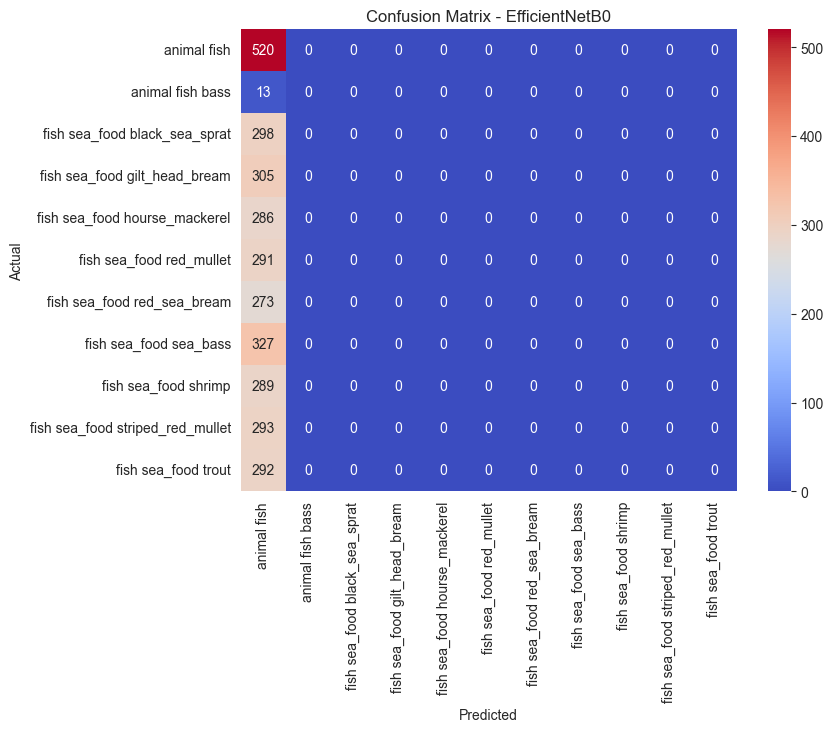

In [11]:
# Load the saved EfficientNetB0 model (adjust path if needed)
efficientnet_model = tf.keras.models.load_model('efficientnetb0_fish_classifier.h5')

# Evaluate EfficientNetB0 model on your test set generator
efficientnet_score = efficientnet_model.evaluate(test_gen)
print(f"EfficientNetB0 Test Loss: {efficientnet_score[0]:.4f}")
print(f"EfficientNetB0 Test Accuracy: {efficientnet_score[1]:.4f}")

# Predict classes for test data
y_true_efficientnet = test_gen.classes
y_pred_efficientnet = np.argmax(efficientnet_model.predict(test_gen), axis=1)

# Print classification report to see precision, recall, f1-score per class
print(classification_report(y_true_efficientnet, y_pred_efficientnet, target_names=class_labels))

# Create and plot confusion matrix heatmap for detailed error analysis
cm_efficientnet = confusion_matrix(y_true_efficientnet, y_pred_efficientnet)
plt.figure(figsize=(8,6))
sns.heatmap(cm_efficientnet, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - EfficientNetB0")
plt.show()

In [13]:
from tensorflow.keras.applications import ResNet50
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_gen.classes),
    y=train_gen.classes
)
class_weight_dict = dict(enumerate(class_weights))

# Load base ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze initially

# Build model
resnet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Initial training
resnet_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    class_weight=class_weight_dict,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)

# Fine-tuning last 20 layers
base_model.trainable = True
fine_tune_at = len(base_model.layers) - 20
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

resnet_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

resnet_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    class_weight=class_weight_dict,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)

resnet_model.save('resnet50_fish_classifier_finetuned.h5')


/Users/shawnlasrado/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 440s 2s/step - accuracy: 0.0860 - loss: 2.5240 - val_accuracy: 0.0440 - val_loss: 2.4013
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 428s 2s/step - accuracy: 0.0724 - loss: 2.4075 - val_accuracy: 0.1401 - val_loss: 2.3750
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - accuracy: 0.0752 - loss: 2.4369 - val_accuracy: 0.0321 - val_loss: 2.3592
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 432s 2s/step - accuracy: 0.0863 - loss: 2.3527 - val_accuracy: 0.0092 - val_loss: 2.3606
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 433s 2s/step - accuracy: 0.0694 - loss: 2.3226 - val_accuracy: 0.0110 - val_loss: 2.3530
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 440s 2s/step - accuracy: 0.0761 - loss: 2.2909 - val_accuracy: 0.0623 - val_loss: 2.3299
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 436s 2s/step - accuracy: 0.0834 - loss: 2.2913 - val_accuracy: 0.0339 - val_loss: 2.3232
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 437s 2s/step - accuracy: 0.0838 - loss: 2.2783 - val_accu

100/100 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.4628 - loss: 1.5631
ResNet50 Test Loss: 1.7443
ResNet50 Test Accuracy: 0.4167
100/100 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step
                                  precision    recall  f1-score   support

                     animal fish       0.91      0.50      0.65       520
                animal fish bass       0.08      0.62      0.14        13
   fish sea_food black_sea_sprat       0.35      0.76      0.48       298
   fish sea_food gilt_head_bream       0.37      0.14      0.21       305
   fish sea_food hourse_mackerel       0.42      0.36      0.39       286
        fish sea_food red_mullet       0.27      0.55      0.36       291
     fish sea_food red_sea_bream       0.52      0.16      0.25       273
          fish sea_food sea_bass       0.41      0.25      0.31       327
            fish sea_food shrimp       0.47      0.61      0.53       289
fish sea_food striped_red_mullet       0.22      0.10      0.14       293
         

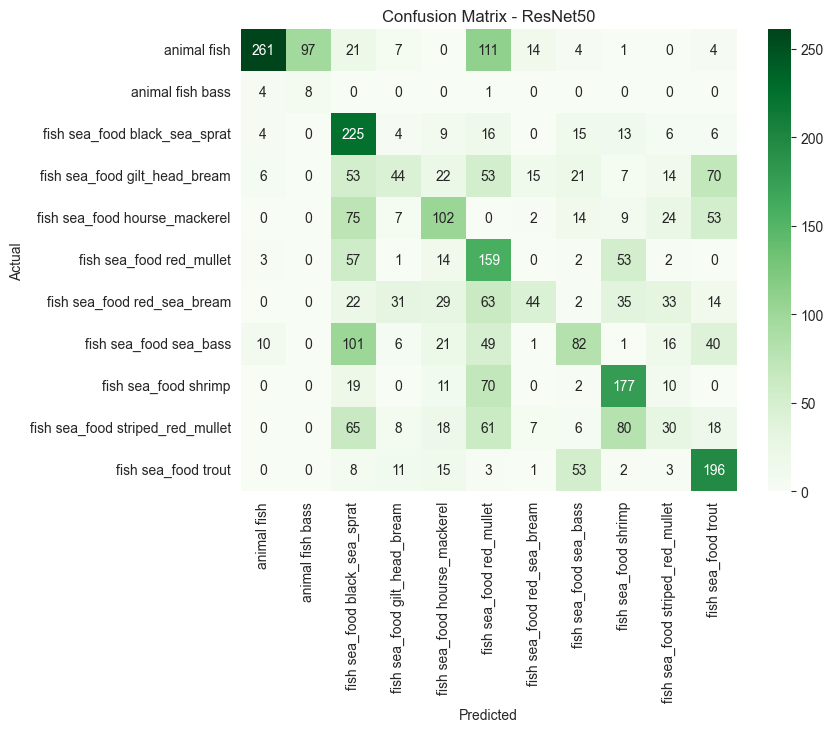

In [14]:
# Load the saved ResNet50 model (adjust path if needed)
resnet_model = tf.keras.models.load_model('resnet50_fish_classifier_finetuned.h5')

# Evaluate ResNet50 model on your test data generator
resnet_score = resnet_model.evaluate(test_gen)
print(f"ResNet50 Test Loss: {resnet_score[0]:.4f}")
print(f"ResNet50 Test Accuracy: {resnet_score[1]:.4f}")

# Get true labels and model predictions
y_true_resnet = test_gen.classes
y_pred_resnet = np.argmax(resnet_model.predict(test_gen), axis=1)

# Print detailed classification metrics
print(classification_report(y_true_resnet, y_pred_resnet, target_names=class_labels))

# Plot confusion matrix
cm_resnet = confusion_matrix(y_true_resnet, y_pred_resnet)
plt.figure(figsize=(8,6))
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Greens', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - ResNet50")
plt.show()

In [15]:
from tensorflow.keras.applications import EfficientNetB0

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

efficientnet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

efficientnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

efficientnet_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    class_weight=class_weight_dict,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)

base_model.trainable = True
fine_tune_at = len(base_model.layers) - 20
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

efficientnet_model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

efficientnet_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    class_weight=class_weight_dict,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)]
)

efficientnet_model.save('efficientnetb0_fish_classifier_finetuned.h5')


Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 175s 871ms/step - accuracy: 0.0946 - loss: 2.4418 - val_accuracy: 0.0888 - val_loss: 2.3983
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 171s 876ms/step - accuracy: 0.0833 - loss: 2.3943 - val_accuracy: 0.0962 - val_loss: 2.3984
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.0838 - loss: 2.4011 - val_accuracy: 0.0888 - val_loss: 2.3963
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 193s 990ms/step - accuracy: 0.0886 - loss: 2.3837 - val_accuracy: 0.0962 - val_loss: 2.3980
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 180s 925ms/step - accuracy: 0.0515 - loss: 2.4268 - val_accuracy: 0.0962 - val_loss: 2.3978
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 181s 930ms/step - accuracy: 0.1052 - loss: 2.3231 - val_accuracy: 0.0962 - val_loss: 2.3979
Epoch 1/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.0857 - loss: 2.4312 - val_accuracy: 0.0888 - val_loss: 2.3946
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.0972 - loss: 2.

100/100 ━━━━━━━━━━━━━━━━━━━━ 70s 680ms/step - accuracy: 0.0152 - loss: 4.5415
EfficientNetB0 Test Loss: 3.8525
EfficientNetB0 Test Accuracy: 0.0919
100/100 ━━━━━━━━━━━━━━━━━━━━ 68s 672ms/step
                                  precision    recall  f1-score   support

                     animal fish       0.00      0.00      0.00       520
                animal fish bass       0.00      0.00      0.00        13
   fish sea_food black_sea_sprat       0.00      0.00      0.00       298
   fish sea_food gilt_head_bream       0.00      0.00      0.00       305
   fish sea_food hourse_mackerel       0.00      0.00      0.00       286
        fish sea_food red_mullet       0.00      0.00      0.00       291
     fish sea_food red_sea_bream       0.00      0.00      0.00       273
          fish sea_food sea_bass       0.00      0.00      0.00       327
            fish sea_food shrimp       0.00      0.00      0.00       289
fish sea_food striped_red_mullet       0.09      1.00      0.17    

/Users/shawnlasrado/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shawnlasrado/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/shawnlasrado/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

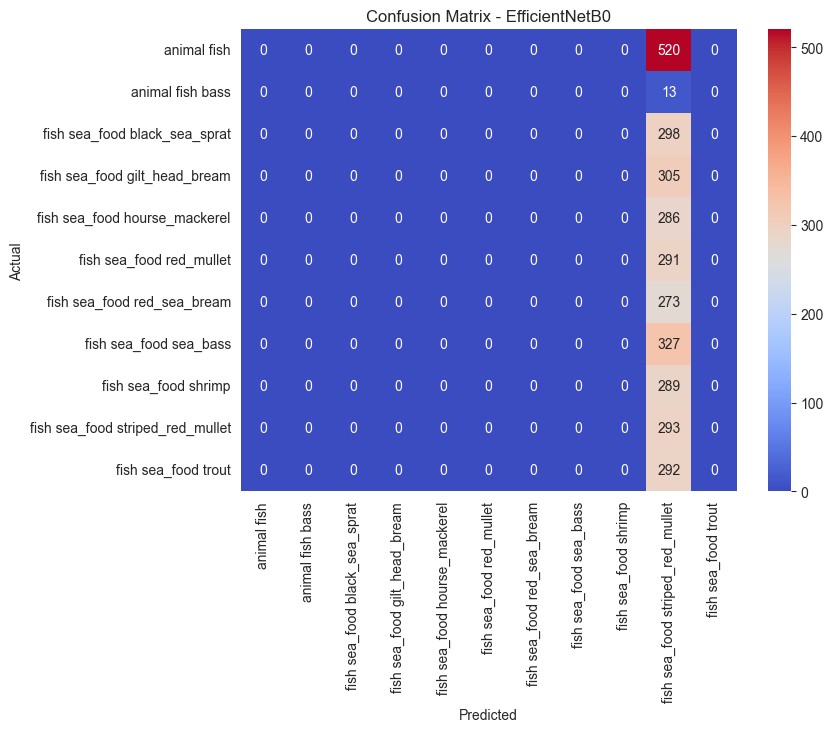

In [16]:
# Load the saved EfficientNetB0 model (adjust path if needed)
efficientnet_model = tf.keras.models.load_model('efficientnetb0_fish_classifier_finetuned.h5')

# Evaluate EfficientNetB0 model on your test data generator
efficientnet_score = efficientnet_model.evaluate(test_gen)
print(f"EfficientNetB0 Test Loss: {efficientnet_score[0]:.4f}")
print(f"EfficientNetB0 Test Accuracy: {efficientnet_score[1]:.4f}")

# Get true labels and predicted labels
y_true_efficientnet = test_gen.classes
y_pred_efficientnet = np.argmax(efficientnet_model.predict(test_gen), axis=1)

# Print detailed classification metrics
print(classification_report(y_true_efficientnet, y_pred_efficientnet, target_names=class_labels))

# Plot confusion matrix
cm_efficientnet = confusion_matrix(y_true_efficientnet, y_pred_efficientnet)
plt.figure(figsize=(8,6))
sns.heatmap(cm_efficientnet, annot=True, fmt='d', cmap='coolwarm', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - EfficientNetB0")
plt.show()


In [24]:
cnn_model = tf.keras.models.load_model('cnn_fish_classifier.h5')

In [25]:
# Suppose you evaluated each model as follows:
cnn_score = cnn_model.evaluate(test_gen)
vgg_score = vgg_model.evaluate(test_gen)
resnet_score = resnet_model.evaluate(test_gen)
mobilenet_score = mobilenet_model.evaluate(test_gen)
inception_score = inception_model.evaluate(test_gen)
efficientnet_score = efficientnet_model.evaluate(test_gen)

# Now assign accuracy values:
cnn_acc = cnn_score[1]
vgg_acc = vgg_score[1]
resnet_acc = resnet_score[1]
mobilenet_acc = mobilenet_score[1]
inception_acc = inception_score[1]
efficientnet_acc = efficientnet_score[1]

# Then you can safely run:
results = {
    "Model": ["CNN", "VGG16", "ResNet50", "MobileNet", "InceptionV3", "EfficientNetB0"],
    "Test Accuracy": [cnn_acc, vgg_acc, resnet_acc, mobilenet_acc, inception_acc, efficientnet_acc]
}
import pandas as pd
pd.DataFrame(results)


/Users/shawnlasrado/PycharmProjects/PythonProject/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 219ms/step - accuracy: 0.8700 - loss: 0.3911
100/100 ━━━━━━━━━━━━━━━━━━━━ 764s 8s/step - accuracy: 0.9681 - loss: 0.1358
100/100 ━━━━━━━━━━━━━━━━━━━━ 243s 2s/step - accuracy: 0.4628 - loss: 1.5631
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 441ms/step - accuracy: 0.9981 - loss: 0.0103
100/100 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.9764 - loss: 0.0733
100/100 ━━━━━━━━━━━━━━━━━━━━ 68s 684ms/step - accuracy: 0.0152 - loss: 4.5415


,Model,Test Accuracy
0,CNN,0.824914
1,VGG16,0.958582
2,ResNet50,0.416693
3,MobileNet,0.998745
4,InceptionV3,0.976467
5,EfficientNetB0,0.091936


**Conclusion -**

Through this project, I learned the importance of proper data cleaning and augmentation for building reliable machine learning models. Experimenting with several deep learning architectures taught me that not every famous model will perform well on every dataset some, like ResNet50 and EfficientNetB0, didn’t deliver good results despite extra fine-tuning. Testing and comparing models side by side made it clear how critical evaluation is when picking the right one for deployment. I also realized how practical tools like Streamlit can turn a machine learning model into an easy to use web app. Overall, this experience helped me understand the value of transfer learning, thorough evaluation, and making AI models actually usable in real world scenarios.